# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

#FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

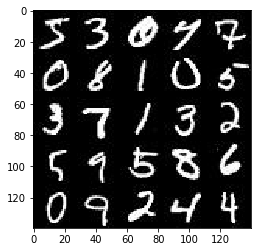

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

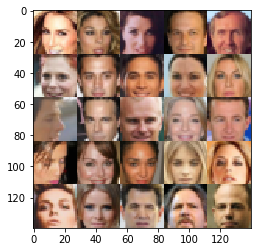

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.9.0


C:\Users\amkle\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_imges = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_imges')
    z_data = tf.placeholder(tf.float32, shape=(None, z_dim), name = 'z_data')
    learning_rate = tf.placeholder(tf.float32, shape=None, name = 'learning_rate')

    return input_imges, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator', reuse = not is_train):
    # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(0.1 * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.1 * x2, x2)
        # 14x14x128 now
        
        # Output layer
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x2, training=True)
        x3 = tf.maximum(0.1 * x3, x3)
        # 28x28x3 now
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Build the model
    g_model = generator(input_z, out_channel_dim)
    # g_model is the generator output
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    out_channel_dim = [1 if data_image_mode == 'L' else 3]
    
    real_inputs, z_inputs, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(real_inputs, z_inputs, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    batch_num = 0
    saver = tf.train.Saver()
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_num += 1
                #rescale images
                batch_images = batch_images * 2
                #make samples to feed to generator
                sample_z = np.random.uniform(-1,1, size = (batch_size, z_dim))
                #run optimizers
                _ = sess.run(d_train_opt, feed_dict = {real_inputs: batch_images,
                                                       z_inputs: sample_z,
                                                       lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict = {z_inputs:sample_z,
                                                       real_inputs: batch_images, 
                                                       lr: learning_rate})
                
                if batch_num % 10 == 0:
                    train_loss_d = d_loss.eval({z_inputs: sample_z, real_inputs: batch_images})
                    train_loss_g = g_loss.eval({z_inputs: sample_z})
                    
                    print("epoch {}/{}".format(epoch_i+1, epoch_count),
                          "discriminator loss: {:.4f}".format(train_loss_d),
                          "generator loss: {:.4f}".format(train_loss_g))
                    
                if batch_num % 100 == 0:
                    show_generator_output(sess, 10, z_inputs, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

epoch 1/2 discriminator loss: 0.0151 generator loss: 7.6500
epoch 1/2 discriminator loss: 0.8203 generator loss: 5.8470
epoch 1/2 discriminator loss: 3.9678 generator loss: 0.0795
epoch 1/2 discriminator loss: 0.4901 generator loss: 2.6167
epoch 1/2 discriminator loss: 1.0134 generator loss: 2.2755
epoch 1/2 discriminator loss: 1.0894 generator loss: 0.9174
epoch 1/2 discriminator loss: 2.1161 generator loss: 0.1704
epoch 1/2 discriminator loss: 1.1621 generator loss: 0.8420
epoch 1/2 discriminator loss: 1.1905 generator loss: 0.9153
epoch 1/2 discriminator loss: 1.3726 generator loss: 0.5169


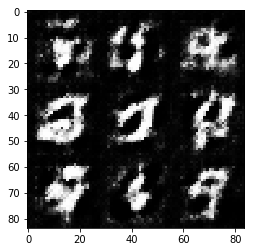

epoch 1/2 discriminator loss: 1.5690 generator loss: 1.2671
epoch 1/2 discriminator loss: 1.0935 generator loss: 0.8557
epoch 1/2 discriminator loss: 1.0605 generator loss: 0.7650
epoch 1/2 discriminator loss: 1.0680 generator loss: 0.6796
epoch 1/2 discriminator loss: 1.0060 generator loss: 0.6313
epoch 1/2 discriminator loss: 0.9224 generator loss: 0.7807
epoch 1/2 discriminator loss: 1.1171 generator loss: 2.2108
epoch 1/2 discriminator loss: 0.9143 generator loss: 1.5514
epoch 1/2 discriminator loss: 0.9682 generator loss: 0.9090
epoch 1/2 discriminator loss: 0.9777 generator loss: 1.0204


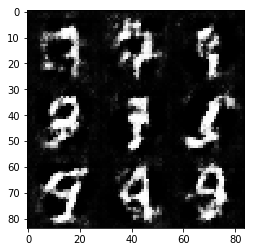

epoch 1/2 discriminator loss: 1.3164 generator loss: 0.4322
epoch 1/2 discriminator loss: 0.9146 generator loss: 1.1863
epoch 1/2 discriminator loss: 0.8745 generator loss: 1.3792
epoch 1/2 discriminator loss: 1.0445 generator loss: 1.1057
epoch 1/2 discriminator loss: 0.8420 generator loss: 1.3534
epoch 1/2 discriminator loss: 1.3222 generator loss: 0.5694
epoch 1/2 discriminator loss: 0.8260 generator loss: 2.0265
epoch 1/2 discriminator loss: 1.2815 generator loss: 0.4505
epoch 1/2 discriminator loss: 1.1809 generator loss: 1.1445
epoch 1/2 discriminator loss: 1.0109 generator loss: 0.9779


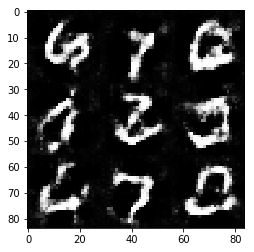

epoch 1/2 discriminator loss: 1.0259 generator loss: 0.7040
epoch 1/2 discriminator loss: 1.1724 generator loss: 0.5213
epoch 1/2 discriminator loss: 1.3614 generator loss: 0.3985
epoch 1/2 discriminator loss: 0.9811 generator loss: 0.9078
epoch 1/2 discriminator loss: 0.9544 generator loss: 0.7747
epoch 1/2 discriminator loss: 0.9396 generator loss: 0.8766
epoch 1/2 discriminator loss: 1.0836 generator loss: 0.8507
epoch 1/2 discriminator loss: 1.1420 generator loss: 0.6426
epoch 1/2 discriminator loss: 0.9598 generator loss: 0.8066
epoch 1/2 discriminator loss: 1.0463 generator loss: 1.3992


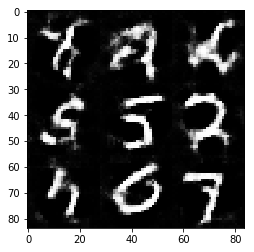

epoch 1/2 discriminator loss: 1.2110 generator loss: 0.5037
epoch 1/2 discriminator loss: 1.1929 generator loss: 0.5226
epoch 1/2 discriminator loss: 1.2107 generator loss: 1.5397
epoch 1/2 discriminator loss: 0.9745 generator loss: 1.8347
epoch 1/2 discriminator loss: 1.2729 generator loss: 0.4865
epoch 1/2 discriminator loss: 1.3072 generator loss: 0.4237
epoch 1/2 discriminator loss: 0.9264 generator loss: 0.9709
epoch 1/2 discriminator loss: 0.8131 generator loss: 1.0885
epoch 1/2 discriminator loss: 1.2707 generator loss: 0.4731
epoch 1/2 discriminator loss: 0.8616 generator loss: 1.9090


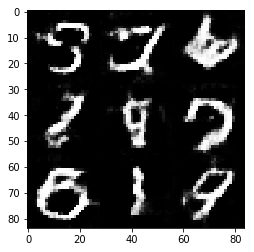

epoch 1/2 discriminator loss: 0.8639 generator loss: 1.3222
epoch 1/2 discriminator loss: 0.8336 generator loss: 1.0381
epoch 1/2 discriminator loss: 0.9519 generator loss: 0.8212
epoch 1/2 discriminator loss: 0.9995 generator loss: 0.7287
epoch 1/2 discriminator loss: 1.2410 generator loss: 0.4887
epoch 1/2 discriminator loss: 0.7488 generator loss: 0.9911
epoch 1/2 discriminator loss: 2.1444 generator loss: 0.2085
epoch 1/2 discriminator loss: 0.8924 generator loss: 0.8558
epoch 1/2 discriminator loss: 1.0147 generator loss: 0.7075
epoch 1/2 discriminator loss: 1.0311 generator loss: 0.6615


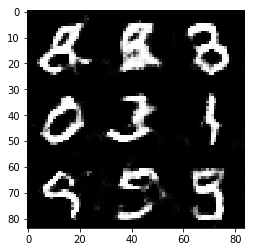

epoch 1/2 discriminator loss: 1.1060 generator loss: 0.6565
epoch 1/2 discriminator loss: 0.9262 generator loss: 0.7237
epoch 1/2 discriminator loss: 0.9704 generator loss: 0.7355
epoch 1/2 discriminator loss: 0.8388 generator loss: 1.0300
epoch 1/2 discriminator loss: 0.9168 generator loss: 0.7708
epoch 1/2 discriminator loss: 0.9052 generator loss: 0.7502
epoch 1/2 discriminator loss: 1.2330 generator loss: 0.4778
epoch 1/2 discriminator loss: 1.3864 generator loss: 0.3825
epoch 1/2 discriminator loss: 0.5570 generator loss: 1.3742
epoch 1/2 discriminator loss: 1.0924 generator loss: 0.5694


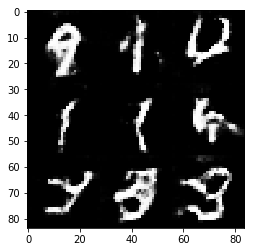

epoch 1/2 discriminator loss: 1.3760 generator loss: 0.4758
epoch 1/2 discriminator loss: 2.3440 generator loss: 4.6579
epoch 1/2 discriminator loss: 1.0843 generator loss: 0.6429
epoch 1/2 discriminator loss: 1.1090 generator loss: 0.7033
epoch 1/2 discriminator loss: 1.1497 generator loss: 0.6127
epoch 1/2 discriminator loss: 1.2835 generator loss: 0.4494
epoch 1/2 discriminator loss: 0.8956 generator loss: 1.8275
epoch 1/2 discriminator loss: 0.9909 generator loss: 0.6665
epoch 1/2 discriminator loss: 1.4278 generator loss: 0.4477
epoch 1/2 discriminator loss: 0.8986 generator loss: 0.8474


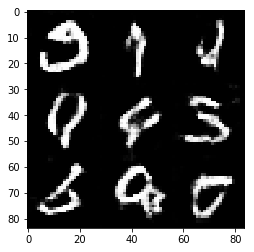

epoch 1/2 discriminator loss: 1.0282 generator loss: 0.7363
epoch 1/2 discriminator loss: 0.7078 generator loss: 0.9638


KeyboardInterrupt: 

In [12]:
batch_size = 50
z_dim = 120
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

epoch 1/1 discriminator loss: 0.8145 generator loss: 0.9048
epoch 1/1 discriminator loss: 0.4380 generator loss: 11.2574
epoch 1/1 discriminator loss: 2.4696 generator loss: 0.1850
epoch 1/1 discriminator loss: 1.8293 generator loss: 2.3349
epoch 1/1 discriminator loss: 1.7452 generator loss: 0.3185
epoch 1/1 discriminator loss: 1.2594 generator loss: 0.5971
epoch 1/1 discriminator loss: 1.1862 generator loss: 0.5220
epoch 1/1 discriminator loss: 1.0287 generator loss: 0.6812
epoch 1/1 discriminator loss: 0.6453 generator loss: 1.1560
epoch 1/1 discriminator loss: 2.0918 generator loss: 0.2255


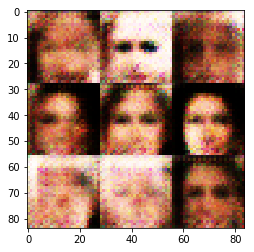

epoch 1/1 discriminator loss: 0.2414 generator loss: 3.5957
epoch 1/1 discriminator loss: 0.7400 generator loss: 4.6557
epoch 1/1 discriminator loss: 0.9318 generator loss: 2.2969
epoch 1/1 discriminator loss: 1.7894 generator loss: 2.9810
epoch 1/1 discriminator loss: 1.2582 generator loss: 0.4458
epoch 1/1 discriminator loss: 0.9301 generator loss: 3.2115
epoch 1/1 discriminator loss: 0.3245 generator loss: 2.1314
epoch 1/1 discriminator loss: 0.7339 generator loss: 1.6412
epoch 1/1 discriminator loss: 0.8125 generator loss: 0.8464
epoch 1/1 discriminator loss: 2.2631 generator loss: 0.1379


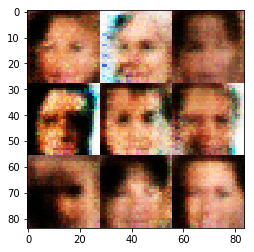

epoch 1/1 discriminator loss: 0.4474 generator loss: 1.8715
epoch 1/1 discriminator loss: 0.1327 generator loss: 4.7438
epoch 1/1 discriminator loss: 1.0034 generator loss: 2.6603
epoch 1/1 discriminator loss: 1.3965 generator loss: 4.1255
epoch 1/1 discriminator loss: 0.2927 generator loss: 1.7456
epoch 1/1 discriminator loss: 0.6702 generator loss: 1.4086
epoch 1/1 discriminator loss: 0.4846 generator loss: 2.4740
epoch 1/1 discriminator loss: 0.6456 generator loss: 1.0564
epoch 1/1 discriminator loss: 2.5787 generator loss: 4.9147
epoch 1/1 discriminator loss: 0.2270 generator loss: 2.5202


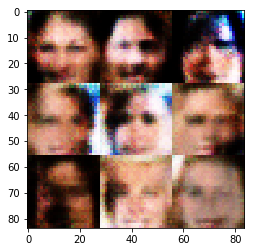

epoch 1/1 discriminator loss: 0.8449 generator loss: 0.8476
epoch 1/1 discriminator loss: 0.6328 generator loss: 4.0513
epoch 1/1 discriminator loss: 0.6019 generator loss: 5.1867
epoch 1/1 discriminator loss: 0.3034 generator loss: 4.0741
epoch 1/1 discriminator loss: 0.7327 generator loss: 0.9504
epoch 1/1 discriminator loss: 0.4588 generator loss: 2.2415
epoch 1/1 discriminator loss: 0.1975 generator loss: 3.0419
epoch 1/1 discriminator loss: 0.9919 generator loss: 0.6406
epoch 1/1 discriminator loss: 0.2874 generator loss: 5.6007
epoch 1/1 discriminator loss: 0.6165 generator loss: 4.2464


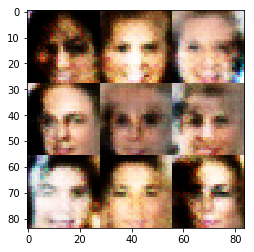

epoch 1/1 discriminator loss: 0.4631 generator loss: 1.7908
epoch 1/1 discriminator loss: 1.0191 generator loss: 0.8166
epoch 1/1 discriminator loss: 0.7775 generator loss: 1.0190
epoch 1/1 discriminator loss: 0.1191 generator loss: 3.5386
epoch 1/1 discriminator loss: 1.4063 generator loss: 0.4408
epoch 1/1 discriminator loss: 1.7342 generator loss: 0.2875
epoch 1/1 discriminator loss: 1.3505 generator loss: 0.4695
epoch 1/1 discriminator loss: 0.9521 generator loss: 0.9721
epoch 1/1 discriminator loss: 0.9299 generator loss: 0.8992
epoch 1/1 discriminator loss: 1.0907 generator loss: 0.5621


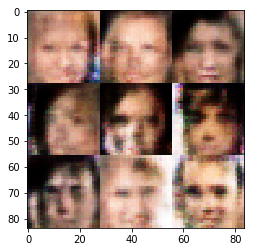

epoch 1/1 discriminator loss: 0.4342 generator loss: 4.5097
epoch 1/1 discriminator loss: 0.9249 generator loss: 4.1179
epoch 1/1 discriminator loss: 0.3404 generator loss: 2.7924
epoch 1/1 discriminator loss: 1.7581 generator loss: 0.3190
epoch 1/1 discriminator loss: 1.0484 generator loss: 0.9906
epoch 1/1 discriminator loss: 1.1998 generator loss: 0.9315
epoch 1/1 discriminator loss: 0.9077 generator loss: 1.1971
epoch 1/1 discriminator loss: 0.7419 generator loss: 1.2024
epoch 1/1 discriminator loss: 1.8308 generator loss: 0.2149
epoch 1/1 discriminator loss: 0.9384 generator loss: 1.1212


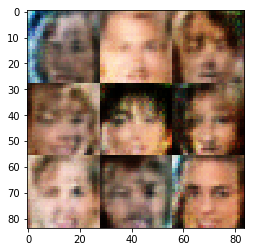

epoch 1/1 discriminator loss: 1.3722 generator loss: 0.4145
epoch 1/1 discriminator loss: 0.6730 generator loss: 1.5342
epoch 1/1 discriminator loss: 1.9226 generator loss: 2.8457
epoch 1/1 discriminator loss: 1.3045 generator loss: 3.7532
epoch 1/1 discriminator loss: 0.8840 generator loss: 0.7610
epoch 1/1 discriminator loss: 1.3040 generator loss: 0.6620
epoch 1/1 discriminator loss: 0.8961 generator loss: 0.7414
epoch 1/1 discriminator loss: 0.9593 generator loss: 1.0227
epoch 1/1 discriminator loss: 0.7560 generator loss: 1.3746
epoch 1/1 discriminator loss: 0.9655 generator loss: 2.4400


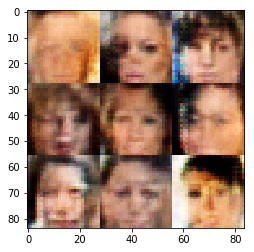

epoch 1/1 discriminator loss: 0.4399 generator loss: 2.3315
epoch 1/1 discriminator loss: 0.2975 generator loss: 1.8900
epoch 1/1 discriminator loss: 1.2201 generator loss: 4.1558
epoch 1/1 discriminator loss: 1.2322 generator loss: 1.9537
epoch 1/1 discriminator loss: 0.5221 generator loss: 1.6591
epoch 1/1 discriminator loss: 0.9288 generator loss: 0.6874
epoch 1/1 discriminator loss: 1.1099 generator loss: 0.8338
epoch 1/1 discriminator loss: 1.3092 generator loss: 0.6483
epoch 1/1 discriminator loss: 1.2759 generator loss: 0.4653
epoch 1/1 discriminator loss: 2.1762 generator loss: 0.1594


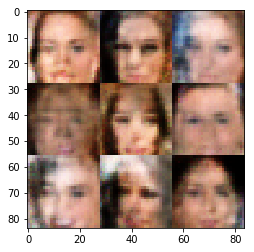

epoch 1/1 discriminator loss: 0.7133 generator loss: 2.4246
epoch 1/1 discriminator loss: 1.6607 generator loss: 0.4216
epoch 1/1 discriminator loss: 0.9294 generator loss: 1.3200
epoch 1/1 discriminator loss: 0.7029 generator loss: 0.9520
epoch 1/1 discriminator loss: 1.0409 generator loss: 4.1866
epoch 1/1 discriminator loss: 1.6656 generator loss: 0.2784
epoch 1/1 discriminator loss: 1.6752 generator loss: 0.2771
epoch 1/1 discriminator loss: 1.1366 generator loss: 1.0813
epoch 1/1 discriminator loss: 1.2625 generator loss: 0.7739
epoch 1/1 discriminator loss: 1.0310 generator loss: 0.9469


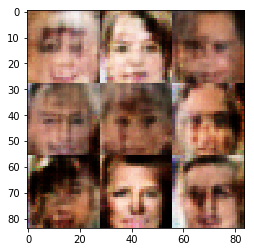

epoch 1/1 discriminator loss: 1.1904 generator loss: 0.7202
epoch 1/1 discriminator loss: 1.1399 generator loss: 0.5402
epoch 1/1 discriminator loss: 1.1934 generator loss: 0.6993
epoch 1/1 discriminator loss: 0.7154 generator loss: 1.0265
epoch 1/1 discriminator loss: 0.7076 generator loss: 0.8649


KeyboardInterrupt: 

In [13]:
batch_size = 50
z_dim = 120
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.